In [1]:
## 1. 定义泛化向量

In [2]:
import math
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from abc import ABCMeta, abstractmethod
from chapters.internal.tools.tools import project_dir
from chapters.internal.tools.transform import add


class Vector(metaclass=ABCMeta):

    @classmethod
    @property
    @abstractmethod
    def zero(cls):
        pass

    @abstractmethod
    def scale(self, scalar: float):
        pass

    @abstractmethod
    def add(self, other):
        pass

    def sub(self, other):
        return self.add(-1.0 * other)

    def __mul__(self, other: float):
        return self.scale(other)

    def __rmul__(self, other):
        return self.scale(other)

    def __add__(self, other):
        return self.add(other)

    def __sub__(self, other):
        return self.sub(other)

    def __neg__(self):
        return self.scale(-1)

    def __truediv__(self, scalar: float):
        return self.scale(1.0 / scalar)

    @abstractmethod
    def approximate_eq(self, o):
        pass


class CoordinateVector(Vector):
    @property
    @abstractmethod
    def dimension(self):
        pass

    def __init__(self, *coordinates) -> None:
        self.coordinates = tuple(x for x in coordinates)

    def add(self, other):
        # call own constructor . with *
        return self.__class__(*add(self.coordinates, other.coordinates))

    def scale(self, scalar: float):
        return self.__class__(*[x * scalar for x in self.coordinates])

    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

    def __eq__(self, o) -> bool:
        if not self.__class__ == o.__class__:
            return False
        for idx, item in enumerate(self.coordinates):
            if not item == o.coordinates[idx]:
                return False
        return True

    def approximate_eq(self, o) -> bool:
        for idx, item in enumerate(self.coordinates):
            if not math.isclose(item, o.coordinates[idx]):
                return False
        return True

    def __str__(self):
        s = ",".join([str(x) for x in self.coordinates])
        return f"({s})"


class Vec2(CoordinateVector):
    @classmethod
    def zero(cls):
        return Vec2(0, 0)

    @property
    def dimension(self):
        return 2


print(Vec2(1, 3) - Vec2(5, 1))

(-4.0,2.0)


### 1.1 测试泛化向量的封闭性

下面是一个通用的单元测试 for `vec2`

In [3]:
from random import uniform


def random_scalar() -> float:
    return uniform(-10, 10)


def random_vec2() -> Vec2:
    return Vec2(random_scalar(), random_scalar())


def eq(u: Vector, v: Vector) -> bool:
    return u.approximate_eq(v)


def test(a: float, b: float, u: Vector, v: Vector, w: Vector):
    # 交换律
    assert eq(u + v, v + u)
    # 结合律
    assert eq(u + (v + w), (u + v) + w)
    # 乘法结合律
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))


for i in range(0, 10):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test(a, b, u, v, w)
    print(f"success unit test:{i}")

success unit test:0
success unit test:1
success unit test:2
success unit test:3
success unit test:4
success unit test:5
success unit test:6
success unit test:7
success unit test:8
success unit test:9


### 1.2 练习

> exec 6.1 : 实现 Vec3

In [4]:
class Vec3(CoordinateVector):
    @property
    def dimension(self):
        return 3

    @classmethod
    def zero(cls):
        return Vec3(0, 0, 0)


> exec 6.2 : 实现 Vec6

In [5]:

class Vec6(CoordinateVector):
    @classmethod
    def zero(cls):
        return Vec6(0, 0, 0)

    @property
    def dimension(self):
        return 6


print(Vec6(1, 2, 3, 4, 5, 6) * 2)

(2,4,6,8,10,12)


> exec 6.3 为 Vec3 写通用的测试

In [6]:
def random_vec3() -> Vec3:
    return Vec3(random_scalar(), random_scalar(), random_scalar())


for i in range(0, 10):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec3(), random_vec3(), random_vec3()
    test(a, b, u, v, w)
    print(f"success unit test:{i}")

success unit test:0
success unit test:1
success unit test:2
success unit test:3
success unit test:4
success unit test:5
success unit test:6
success unit test:7
success unit test:8
success unit test:9


> exec 6.4: 测试 线性组合 和 zero 的不变性

In [7]:

def test(a: float, b: float, u: Vector, v: Vector, w: Vector, zero: Vector):
    # 交换律
    assert eq(u + v, v + u)
    # 结合律
    assert eq(u + (v + w), (u + v) + w)
    # 乘法结合律
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    assert eq(zero + v, v)
    assert eq(0 * v, zero)


for i in range(0, 10):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test(a, b, u, v, w, Vec2.zero())
    print(f"success unit test:{i}")

success unit test:0
success unit test:1
success unit test:2
success unit test:3
success unit test:4
success unit test:5
success unit test:6
success unit test:7
success unit test:8
success unit test:9


## 2. 向量空间例子

> `Vec1` 1维向量空间是 实数空间, `Vec0` 则是 零空间. 他们都很特殊, 所谓的标量就是位于 1维的实数空间 . 零空间非常特殊 . 其实可以把  Vec0 , Vec1 的组合又看成向量空间

In [8]:
class Vec1(Vector):

    def __init__(self, x: float):
        self.x = x

    @classmethod
    def zero(cls):
        return Vec1(0)

    def scale(self, scalar: float):
        return Vec1(scalar * self.x)

    def add(self, other):
        return Vec1(self.x + other.x)

    def approximate_eq(self, o):
        return math.isclose(o.x, self.x)


class Vec0(Vector):

    def __init__(self):
        pass

    @classmethod
    def zero(cls):
        return Vec0()

    def scale(self, scalar: float):
        return Vec0()

    def add(self, other):
        return other

    def approximate_eq(self, o):
        return True

> 把现实生活中的 实体封装为 Vector 其实就是一种 **数学建模** 的过程 ; 例如下面的车子 .

In [9]:
from datetime import datetime


class CarForSale(Vector):
    retrieved_date = datetime(2018, 11, 30, 12)  #1

    def __init__(self, model_year, mileage, price, posted_datetime,
                 model="(virtual)", source="(virtual)",  #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

    def add(self, other):
        def add_dates(d1, d2):  #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age

        return CarForSale(  #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )

    def approximate_eq(self, o):
        pass

    def scale(self, scalar):
        def scale_date(d):  #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)

        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )

    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

> 只要能够定义出 向量的2个算法就可以定义出对应的向量空间 . 也就是代码中的 `add` 和 `scale`

> 下面我们把 代数中的函数 `f(x) = y` 其实是个单变量函数 定义为向量空间

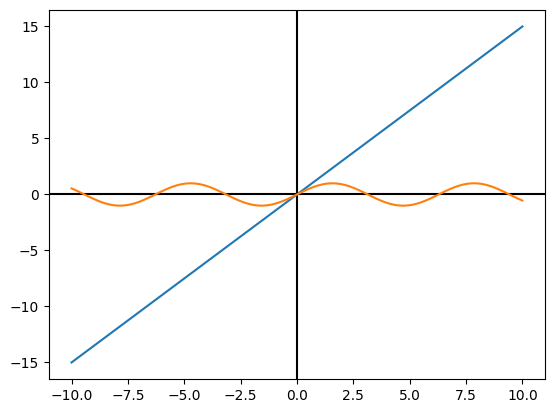

In [10]:
import numpy as np
import matplotlib.pyplot as pit
from math import sin


def plot(fs, xmin, xmax):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = pit.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        pit.plot(xs, ys)


def f(x):
    return 0.5 * x * 3


def g(x):
    return sin(x)


plot([f, g], -10, 10)

> 下面， 我们实现 对于函数的 标量乘法 和 加法 , 画出 f,g , f+g, g*3 的效果

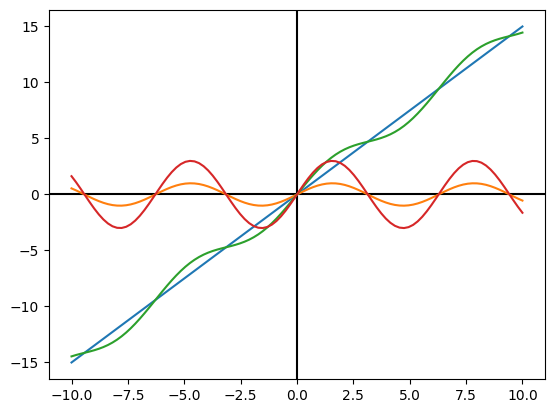

In [11]:
def add_functions(f, g):
    def new_function(x):
        return f(x) + g(x)

    return new_function


def scale_functions(f, scalar):
    def new_function(x):
        return f(x) * scalar

    return new_function


# 把上面的 2个函数进行加法
plot([f, g, add_functions(f, g), scale_functions(g, 3)], -10, 10)

下面, 我们把函数直接封装到 向量空间中 .

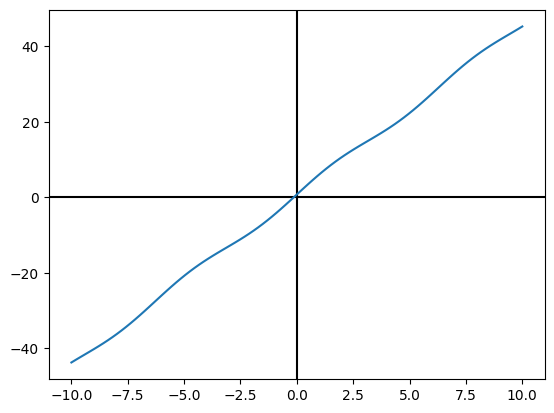

In [12]:
class FunctionVector(Vector):
    def __init__(self, func):
        self.func = func

    def approximate_eq(self, o):
        pass

    @classmethod
    def zero(cls):
        def zero_function(x):
            return 0

        return zero_function

    def scale(self, scalar: float):
        def new_func(x):
            return self.func(x) * scalar

        return FunctionVector(new_func)

    def add(self, other):
        def new_func(x):
            return self.func(x) + other.func(x)

        return FunctionVector(new_func)

    def __call__(self, args):
        return self.func(args)


def plot_func_vectors(xmin, xmax, *vectors):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = pit.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for v in vectors:
        ys = [v.func(x) for x in xs]
        pit.plot(xs, ys)


f = FunctionVector(lambda x: 0.5 + x * 3)
g = FunctionVector(math.sin)
# 同样画出了 2个函数的 加法 .
plot_func_vectors(
    -10,
    10,
    1.5 * f + g
)

一个 m*n 的矩阵可以看作一个 m*n 维度的 vector, 定义到向量空间中, 本身的 matrix 也可以定义到向量空间中, 但是没有必要  .

In [13]:
class Matrix5_by_3(Vector):
    rows = 5  #1
    columns = 3

    def __init__(self, matrix):
        self.matrix = matrix

    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a, b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))

    def scale(self, scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))

    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple(  #2
            tuple(0 for j in range(0, cls.columns))
            for i in range(0, cls.rows)
        ))

更接近实际一点, 我们把图像抽象为向量空间 , 使用 `RGB` . 用 pillow 库封装出来 .

In [14]:

from PIL import Image


class ImageVector(Vector):
    # 统一 resize 为 300 * 300
    size = (300, 300)

    def approximate_eq(self, o):
        pass

    def __init__(self, pixels=None, path=None):
        if pixels:
            self.pixels = pixels
        else:
            img = Image.open(project_dir() + "/resources/" + path).resize(ImageVector.size)
            self.pixels = img.getdata()

    def image(self):
        """
        用来画图, r, g,b 必须先转换为整数才能用于画图
        """
        img = Image.new("RGB", ImageVector.size)
        img.putdata(
            [
                (int(r), int(g), int(b))
                for (r, g, b) in self.pixels
            ]
        )
        return img

    def add(self, other):
        return ImageVector(pixels=[(r1 + r2, g1 + g2, b1 + b2)
                                   for ((r1, g1, b1), (r2, g2, b2))
                                   in zip(self.pixels, other.pixels)])

    def scale(self, scalar):  #6
        return ImageVector(pixels=[(scalar * r, scalar * g, scalar * b)
                                   for (r, g, b) in self.pixels])

    def scale(self, scalar):  #6
        return ImageVector(pixels=[(scalar * r, scalar * g, scalar * b)
                                   for (r, g, b) in self.pixels])

    @classmethod
    def zero(cls):  #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector(pixels=[(0, 0, 0) for _ in range(0, total_pixels)])

    def _repr_png_(self):  #8 这是 jupyter book 的特性, 实现这个方法可以显示图片
        return self.image()._repr_png_()




原始图片1如下:

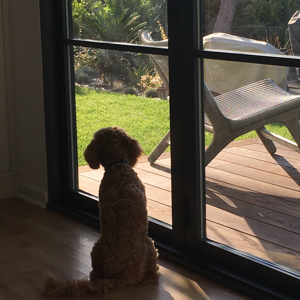

In [15]:
ImageVector(path="inside.JPG")

原始图片2:

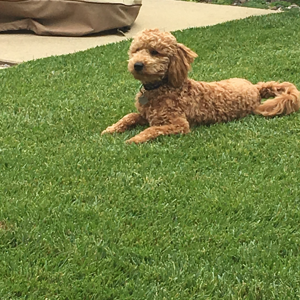

In [16]:
ImageVector(path="outside.JPG")

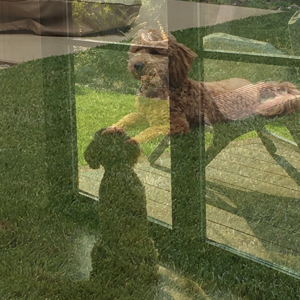

In [17]:
# 按照比例合成
0.5 * ImageVector(path="inside.JPG") + 0.5 * ImageVector(path="outside.JPG")

注意到 RGB 的算法是有问题的， 不能一直 + , 因为颜色的范围都是 0, 255 . 如果搞成负的都是 漆黑一片. 我们把 300 到 300 每个像素都搞为 255 . 就是白色了 .

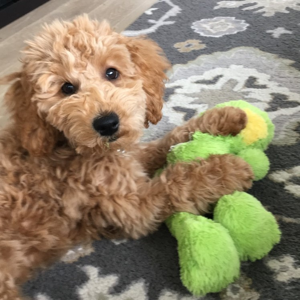

In [18]:
white = ImageVector([(255, 255, 255) for _ in range(0, 300 * 300)])
ImageVector(path="melba_toy.JPG")

使用向量减法， 使用白色 - 原始图片

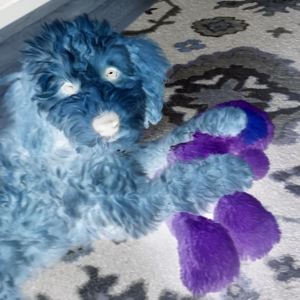

In [19]:
white - ImageVector(path="melba_toy.JPG")

之前的 FunctionVector 仅仅包含了 1个参数, 下面实现一个 包含了 2个参数的函数 的向量空间 .

In [20]:
class Function2(Vector):
    def __init__(self, func2):
        self.func2 = func2

    @classmethod
    def zero(cls):
        return Function2(lambda x, y: 0)

    def scale(self, scalar: float):
        return Function2(lambda x, y: scalar * self.fun2(x, y))

    def add(self, other):
        return Function2(lambda x, y: self.func2(x, y) + other.func2(x, y))

    def __call__(self, x, y):
        return self.func2(x, y)

    def approximate_eq(self, o):
        pass


f2 = Function2(lambda x, y: x + y)
g2 = Function2(lambda x, y: 2 * x + 2 * y)
f2(3, 4) + g2(3, 4)

21

## 3. 子空间


### 3.1 定义子空间

**子空间**: 也就是所谓的向量子空间

- 存在于 某一个向量空间内的一个子空间 (完备的, 封闭的, 对 标量乘法运算 和 加法封闭) ;
- 例子1 : 三维平面中的二维平面, 例如 (x, y, 0) ;
- 我们用如下公式表示 由1个向量张成的 子空间 ;

$$
span({\vec{v}})
$$


- 同样也可以是 一个 向量集 张成的空间

$$
span({\vec{v}, \vec{u}, \vec{w}})
$$

核心在于概念 **线性无关**

- 集合如果 任意1个成员 都不能 通过其他成员的 线性组合而成 我们就认为是线性无关的 ;
$$
{\vec{w}, \vec{u}, \vec{v}}
$$
- 一个线性无关的 向量集的个数 就是他的 **维度**
- 对于 $$R^3$$ 来说 , 向量基可以生成任意1个向量
$$
{\vec{e_1}, \vec{e_2}, \vec{e_3}}
$$
- 所以难点之1 在于如何 通过计算 快速确定 一组 向量集 是不是 **线性无关的**

### 3.2 多项式函数构成的子空间

下面的例子中 , 我们来玩下, 线性函数 , 其中 `a`  和 `b` 是任意的实数 .

$$
f(x) = ax + b
$$

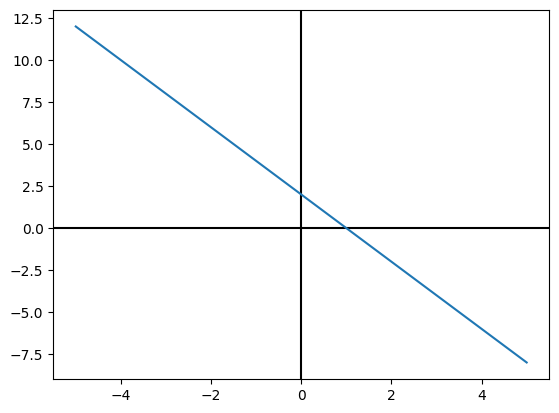

In [21]:
class LinearFunction(Vector):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    @classmethod
    def zero(cls):
        return LinearFunction(0, 0)

    def scale(self, scalar: float):
        return LinearFunction(self.a * scalar, self.b * scalar)

    def add(self, other):
        return LinearFunction(self.a + other.a, self.b + other.b)

    def approximate_eq(self, o):
        pass

    def __call__(self, x):
        return self.a * x + self.b


# 于是画个 f(x) = -2x + 2
plot(
    [LinearFunction(-2, 2)],
    -5,
    5
)


- 2个标准基就可以为上面的 子空间 找到标准基 .

$$f(x) = ax + b$$ 的标准基可以是 .

$$f(x) = x 和 h(x) =1$$

- 同样的道理可以放到任意的多项式空间中, 例如下面的 维度应该是 n + 1

$$
f(x) = a_0 + a_1 \times x + a_2 \times x^2 + ... + a_n \times x^n
$$


### 3.3.3 图像子空间

300 * 300 像素如果是 RGB 的话. 把空间平铺以下就是 27w 维度的空间 .

下面我们搞几个特殊的子空间 . 下面是1维的 . 所有的像素位置都是 一样的, 而且 r = g = b = ? .

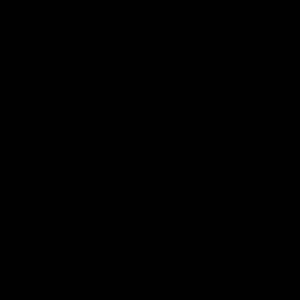

In [22]:
gray = ImageVector(
    [
        (1, 1, 1) for _ in range(0, 300 * 300)
    ]
)

gray

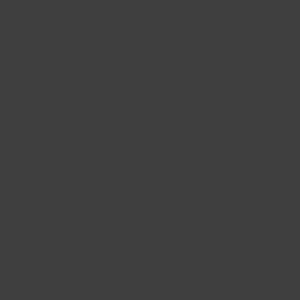

In [23]:
63 * gray

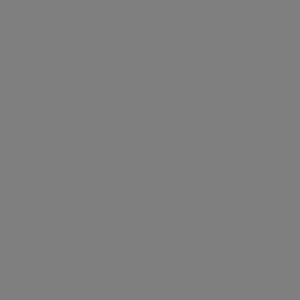

In [24]:
127 * gray

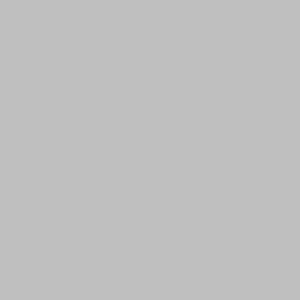

In [25]:
191 * gray

### 3.3.4 demos

> exec1 : 实现 n =2 的多项式 向量空间


In [26]:
class QuadraticFunction(Vector):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    @classmethod
    def zero(cls):
        return QuadraticFunction(0, 0, 0)

    def scale(self, scalar: float):
        return QuadraticFunction(self.a * scalar, self.b * scalar, self.c * scalar)

    def add(self, other):
        return QuadraticFunction(self.a + other.a, self.b + other.b, self.c + other.c)

    def __call__(self, x: float):
        return self.a * x * x + self.b * x + self.c

    def approximate_eq(self, o):
        pass


f = QuadraticFunction(2, 1, 1)
print(f(2))

11


exec 2 :

$$
{4x-1, x-2} 是线性函数的基, -2x + 5 写成他们的线性组合 .
$$

exec3 : 所有多项式的向量空间是1个无限维的组合 . 用代码实现他

exec4 : 先实现一个纯色函数

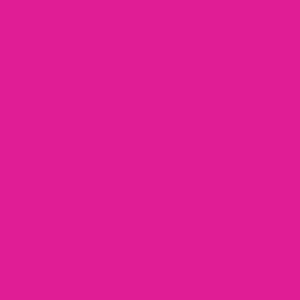

In [27]:
def solid_color(r, g, b):
    return ImageVector(pixels=[
        (r, g, b) for _ in range(300 * 300)
    ])


solid_color(224, 29, 149)

 exec5 : 300 * 300 像素 降维到 30 * 30 . 思路是划分为 10 * 10 的小方格, 小方格, 每个色素都是平均值

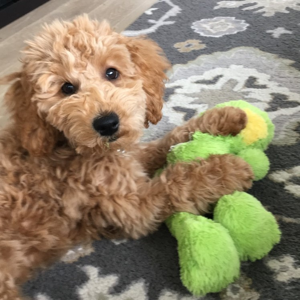

In [28]:
image_size = (300, 300)
total_pixels = image_size[0] * image_size[1]
square_count = 30  # 图片被分解为 30 * 30 的网格
square_width = 10


def ij(n):
    return n // image_size[0], n % image_size[1]


def to_lowres_grayscale(img: ImageVector):
    """
    接收一个 ImageVector 返回一个包含 30个数组的数组, 每个数组有 30个数值， 依次放每个网络的灰度值
    """

    # 1. 30 * 30 的矩阵用 2维数组表示
    matrix = [
        [0 for i in range(0, square_count)]
        for j in range(0, square_count)
    ]

    for (n, p) in enumerate(img.pixels):
        i, j = ij(n)
        weight = 1.0 / (3 * square_width * square_width)
        matrix[i // square_width][j // square_width] += (sum(p) * weight)
    return matrix


def from_lowres_grayscale(matrix):  #<3> 接收1个 30 * 30 的矩阵, 返回1个由 10*10像素块构成的图像, 亮度值 由矩阵给出
    def lowres(pixels, ij):
        i, j = ij
        return pixels[i // square_width][j // square_width]

    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x, x, x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0, total_pixels)])

    return make_highres(matrix)


# 原始图像
v = ImageVector(path="melba_toy.JPG")
v

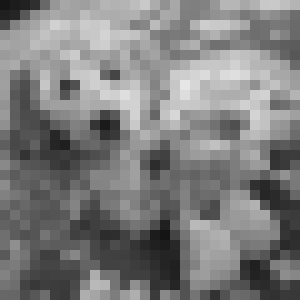

In [29]:
# 1. 先转为矩阵
lowres = to_lowres_grayscale(v)
# 2. 矩阵转化为 v
from_lowres_grayscale(lowres)